# 📊 Exploratory Data Analysis (EDA)
This notebook explores customer data to understand key financial factors influencing car purchase amounts. Insights here guide feature engineering and model development in the main script.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/car_purchasing.csv", encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [4]:
df.drop(['customer name', 'customer e-mail', 'country'], axis=1, inplace=True)

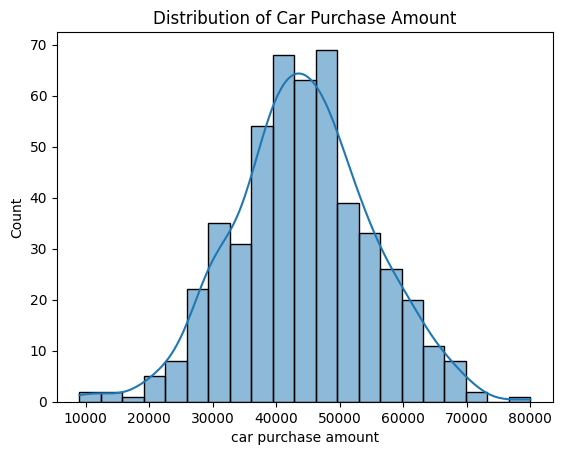

In [5]:
sns.histplot(df['car purchase amount'], kde=True)
plt.title("Distribution of Car Purchase Amount")
plt.show()

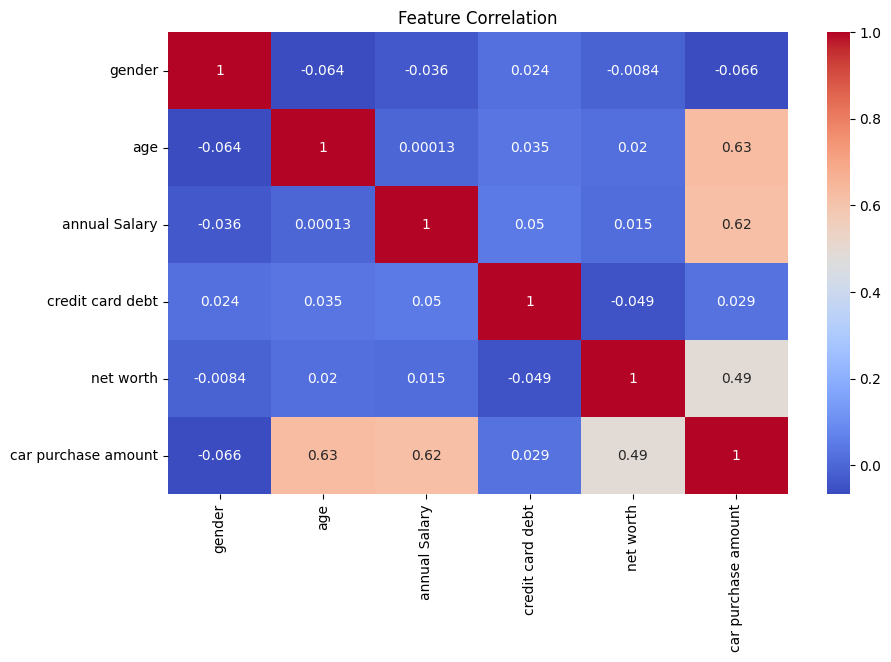

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

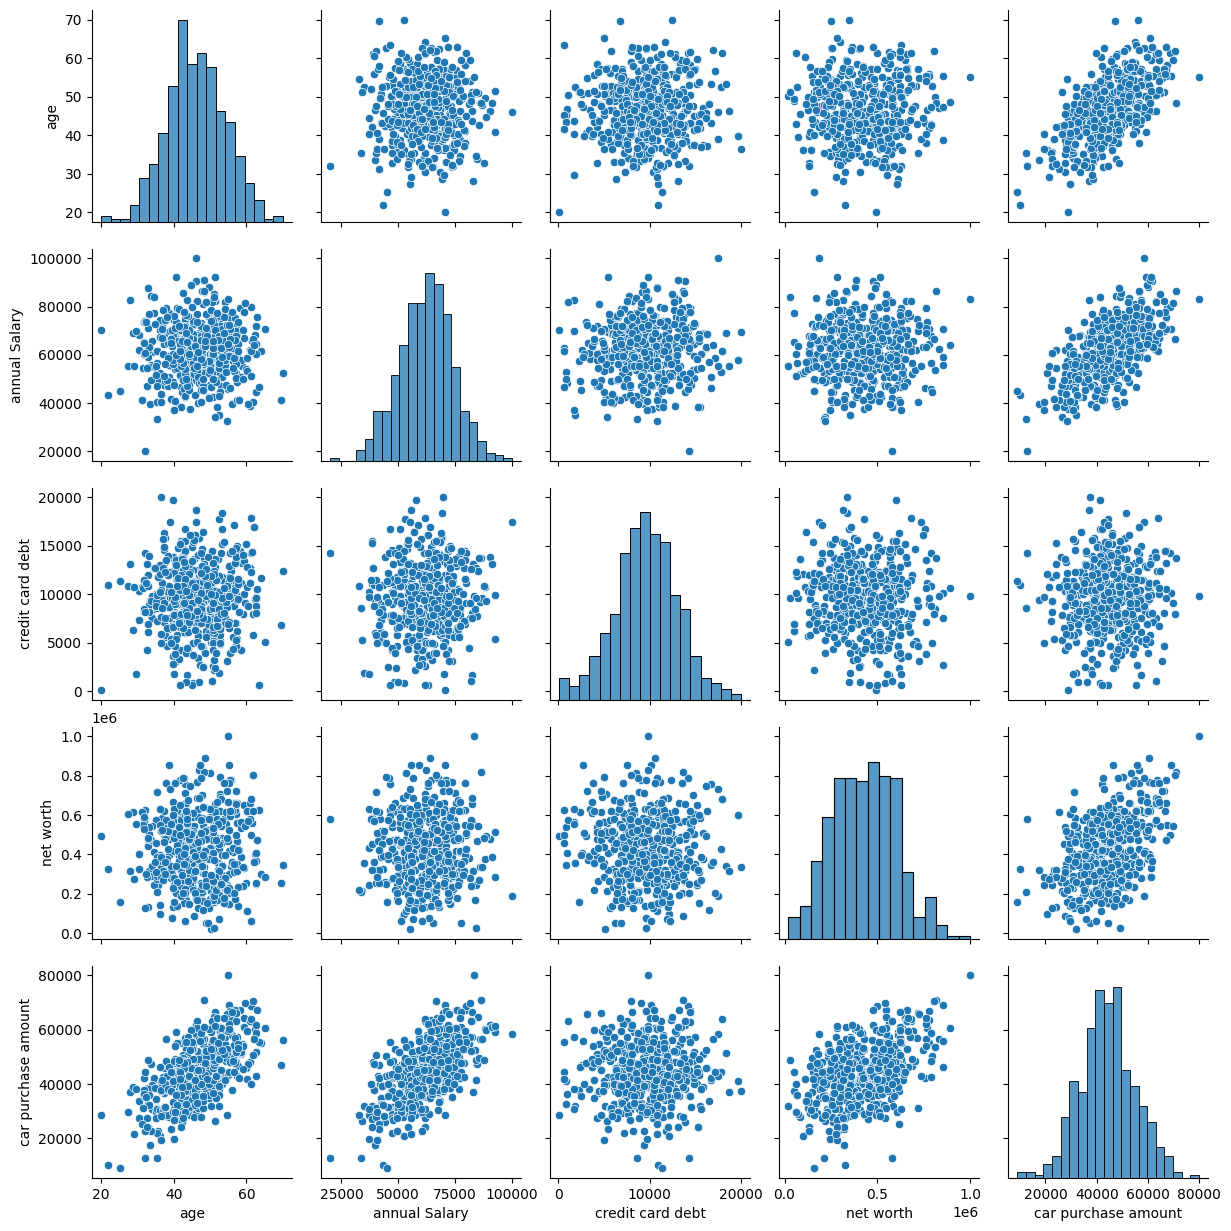

In [7]:
sns.pairplot(df[['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']])

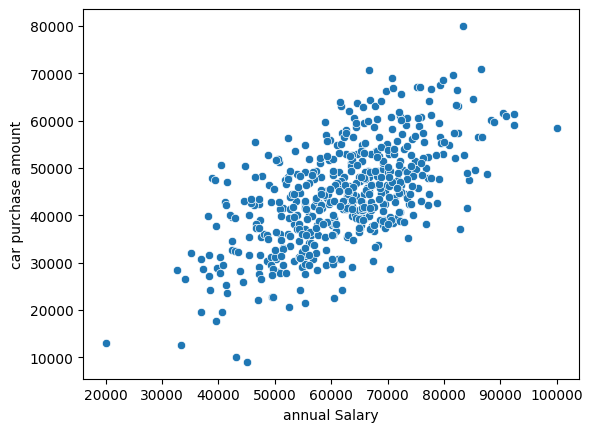

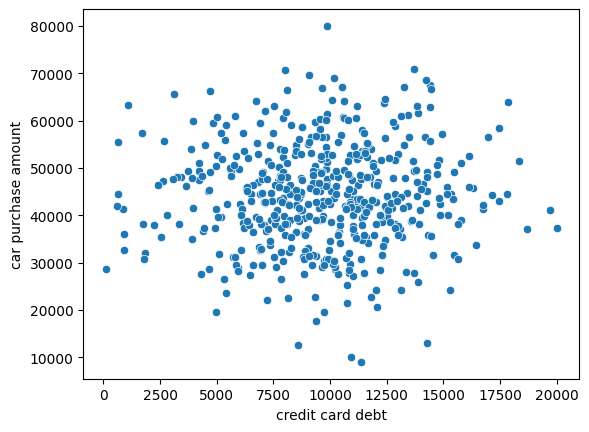

In [8]:
sns.scatterplot(x='annual Salary', y='car purchase amount', data=df)
plt.show()
sns.scatterplot(x='credit card debt', y='car purchase amount', data=df)
plt.show()

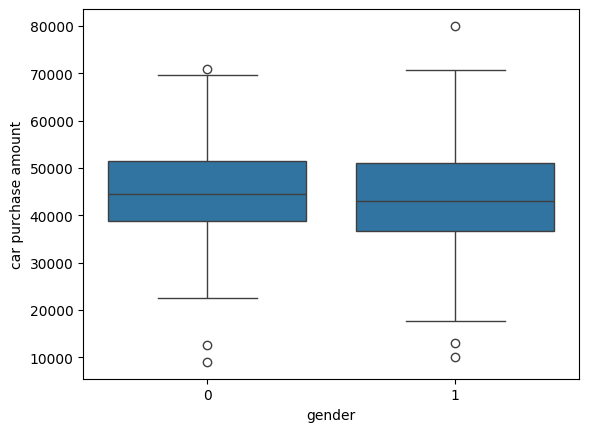

In [9]:
sns.boxplot(x='gender', y='car purchase amount', data=df)
plt.show()

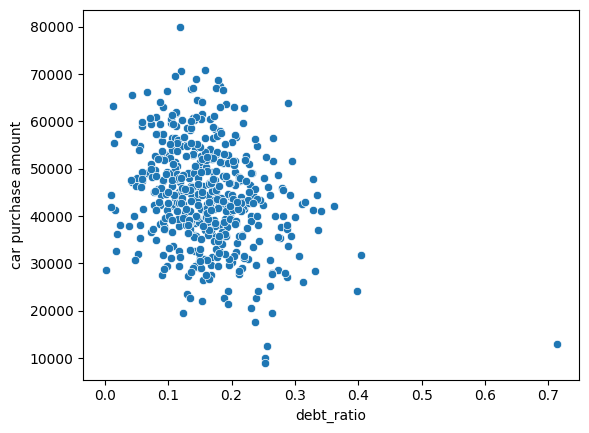

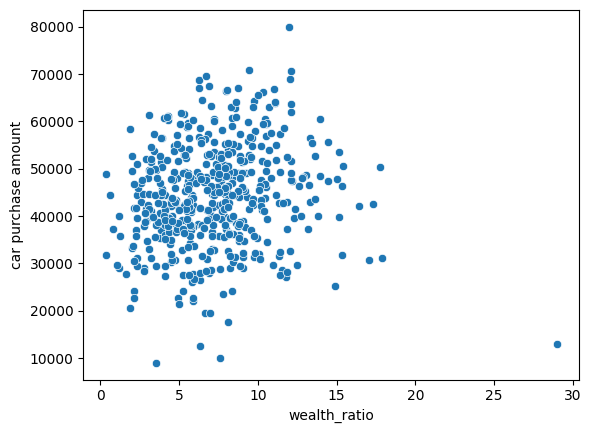

In [10]:
df['debt_ratio'] = df['credit card debt'] / (df['annual Salary'] + 1e-9)
df['wealth_ratio'] = df['net worth'] / (df['annual Salary'] + 1e-9)

sns.scatterplot(x='debt_ratio', y='car purchase amount', data=df)
plt.show()
sns.scatterplot(x='wealth_ratio', y='car purchase amount', data=df)
plt.show()

In [11]:
# Optional: Save cleaned data
df.to_csv("data/cleaned_data.csv", index=False)